## Incident Category Trends Over Time (Flag 4)

### Dataset Description

The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
**Goal**: Identify and analyze increasing trends in the number of incidents assigned to understand the implications of these trends on workload and agent efficiency.

**Role**: Strategic Planning Manager

**Difficulty**: 4 out of 5. This analysis requires a deep dive into the temporal trends and category-specific growth patterns of incidents.

**Category**: Incidents Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks.


In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pandas import date_range

## Load Dataset
This cell loads the dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-4.csv"
df = pd.read_csv(dataset_path)
#display 20 rows. 
df.head(20) 

,category,sys_updated_by,assigned_to,closed_at,closed_by,state,opened_at,sys_updated_on,number,caller_id,short_description,assignment_group,priority
0,Inquiry / Help,admin,Beth Anglin,2023-01-07 20:36:37.755280471,Luke Wilson,Closed,2023-01-01 06:13:00,2023-01-07 20:36:37.755280471,INC0000000000,Caller8,Need help with software installation,Service Desk,3 - Moderate
1,Hardware,employee,Fred Luddy,2023-01-13 18:10:55.953281034,Charlie Whitherspoon,Closed,2023-01-01 18:15:00,2023-01-13 18:10:55.953281034,INC0000000001,Caller1,Hard drive failure reported,Hardware,2 - High
2,Database,employee,Beth Anglin,2023-01-14 18:48:38.566235556,Charlie Whitherspoon,Closed,2023-01-03 04:29:00,2023-01-14 18:48:38.566235556,INC0000000002,Caller5,Facing issue with MySQL database connectivity.,Database,2 - High
3,Hardware,admin,Howard Johnson,2023-01-04 12:31:09.279757024,Charlie Whitherspoon,Resolved,2023-01-03 07:36:00,2023-01-04 12:31:09.279757024,INC0000000003,Caller2,Printer not working properly,Hardware,2 - High
4,Network,employee,Fred Luddy,2023-01-04 15:36:00.000000000,Beth Anglin,Resolved,2023-01-03 15:36:00,2023-01-04 15:36:00.000000000,INC0000000004,Caller7,Unable to connect to the office VPN,Network,2 - High
5,Database,system,Howard Johnson,2023-01-06 13:38:58.646872984,Luke Wilson,Resolved,2023-01-04 07:47:00,2023-01-06 13:38:58.646872984,INC0000000005,Caller2,Database connection issue observed in producti...,Database,2 - High
6,Network,employee,Beth Anglin,2023-01-06 03:27:00.000000000,Howard Johnson,Closed,2023-01-05 03:27:00,2023-01-06 03:27:00.000000000,INC0000000006,Caller3,Network connection is unstable,Network,2 - High
7,Network,employee,Howard Johnson,2023-01-09 07:54:54.500749933,Howard Johnson,Closed,2023-01-05 16:15:00,2023-01-09 07:54:54.500749933,INC0000000007,Caller9,Unable to connect to VPN,Network,2 - High
8,Hardware,admin,Howard Johnson,2023-01-13 05:01:13.875591739,Luke Wilson,Closed,2023-01-05 18:59:00,2023-01-13 05:01:13.875591739,INC0000000008,Caller1,Printer not working properly,Hardware,2 - High
9,Network,admin,Fred Luddy,2023-01-11 05:53:48.822959873,Howard Johnson,Closed,2023-01-08 22:15:00,2023-01-11 05:53:48.822959873,INC0000000009,Caller5,Unable to connect to office VPN,Network,1 - Critical


### **Question 1:** Do we observe any trend in the volume of incidents?

#### Plotting weekly trends in incident volume

This cell creates a line plot to visualize the trend in the volume of incident tickets opened each week. By grouping and counting incidents on a weekly basis, the plot illustrates changes and patterns in the workload over time.

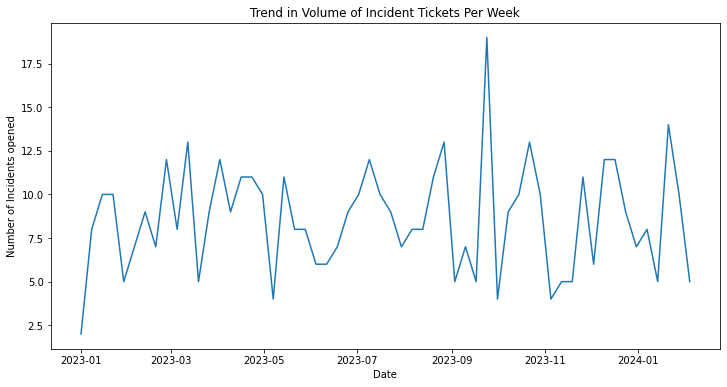

In [3]:
df["opened_at"] = pd.to_datetime(df["opened_at"])
# Sort the DataFrame by the opened_at column
df["date"] = df["opened_at"].dt.date

# Count the number of incidents per day
df_daily_count = df.groupby("date").size().reset_index(name="counts")

# Count the number of incidents per day
df_daily_count["date"] = pd.to_datetime(df_daily_count["date"])

# Resample the data to get the weekly count of incidents
df_weekly_count = df_daily_count.resample("W", on="date").sum().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="counts", data=df_weekly_count)
plt.title("Trend in Volume of Incident Tickets Per Week")
plt.xlabel("Date")
plt.ylabel("Number of Incidents opened")
plt.show()

#### Generate JSON Description for the Insight


In [4]:
{
"data_type":"time_series",
"insight": "There is a slight increase in volume of incidents, but it needs further investigation to better understand the trend.",
"plot": {
    "plot_type": "single_line",
    "title": "Trend of number of incidents opened Over Time",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was opened."
    },
    "y_axis": {
        "name": "Average Volume (incident count)",
        "description": "This represents the average number of incidents opened on a particular date."
    },
    "description": "The line plot displays the trend of volume of incidents across all categories over time. The trend shows a slight increase in the volume of incidents opened over time. The increase is not uniform and there are fluctuations in the volume of incidents opened. Further analysis is required to understand the underlying causes of the increase in volume of incidents."
},
"question": "Do we observe any trend in the volume of incidents?",
"actionable_insight": "The slight increase in volume across all categories suggests that the issue may be specific to one or fewer particular category. This could indicate a systemic issue in the incident management process. It would be beneficial to investigate the overall process and identify areas for improvement to reduce the trend."
}

{'data_type': 'time_series',
 'insight': 'There is a slight increase in volume of incidents, but it needs further investigation to better understand the trend.',
 'plot': {'plot_type': 'single_line',
  'title': 'Trend of number of incidents opened Over Time',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was opened.'},
  'y_axis': {'name': 'Average Volume (incident count)',
   'description': 'This represents the average number of incidents opened on a particular date.'},
  'description': 'The line plot displays the trend of volume of incidents across all categories over time. The trend shows a slight increase in the volume of incidents opened over time. The increase is not uniform and there are fluctuations in the volume of incidents opened. Further analysis is required to understand the underlying causes of the increase in volume of incidents.'},
 'question': 'Do we observe any trend in the volume of incidents?',
 'actionable_insight':

### **Question 2:** Is there a correlation between the volume of incidents and the ttr?

#### Plot correlation between incident volume and average TTR

This cell examines the relationship between the volume of incidents and the time to resolution (TTR) by visualizing two metrics over the same time period as line plots.

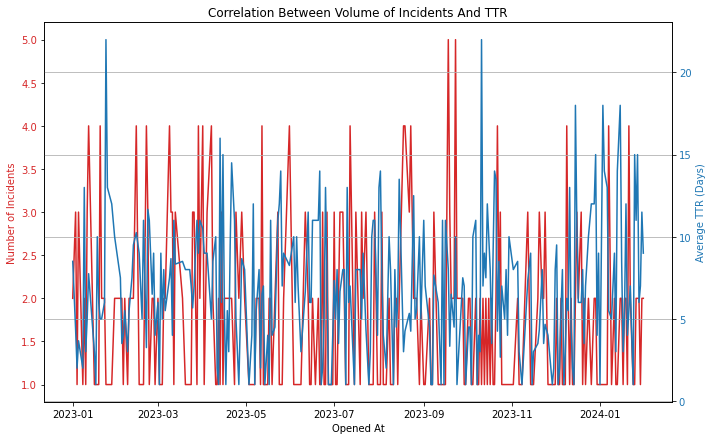

In [5]:
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Group by opened_at date and calculate count of incidents and average ttr
df['ttr'] = df['closed_at'] - df['opened_at']

# Convert ttr to days
df['ttr_days'] = df['ttr'].dt.days
incident_ttr_trend = df.groupby(df['opened_at'].dt.date).agg({'number':'count', 'ttr_days':'mean'})

# Plot the trend
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:red'
ax1.set_xlabel('Opened At')
ax1.set_ylabel('Number of Incidents', color=color)
ax1.plot(incident_ttr_trend.index, incident_ttr_trend['number'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average TTR (Days)', color=color)  
ax2.plot(incident_ttr_trend.index, incident_ttr_trend['ttr_days'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Correlation Between Volume of Incidents And TTR')
plt.grid(True)
plt.show()

#### Generate JSON Description for the Insight


In [6]:
{
"data_type":"diagnostic",
"insight": "There is a no correlation between the volume of incidents and the TTR",
"insight_value":{"correlation": "negative"},
"plot": {
    "plot_type": "dual_axis_line",
    "title": "Correlation Between Volume of Incidents And TTR",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was opened."
    },
    "y_axis_1": {
        "name": "Number of Incidents",
        "description": "This represents the number of incidents opened on a particular date."
    },
    "y_axis_2": {
        "name": "Average TTR (Days)",
        "description": "This represents the average time to resolution (in days) of incidents opened on a particular date."
    },
    "description": "The dual-axis line plot displays the correlation between the volume of incidents and the TTR. The red line represents the number of incidents and the blue line represents the average TTR. As the number of incidents increases, the TTR also tends to increase, indicating a positive correlation."
},
"question": "Is there a correlation between the volume of incidents and the ttr?",
"actionable_insight": "The negative correlation between the volume of incidents and the TTR suggests that as the volume of incidents increases, while ttr is more or less uniform. This could suggest efficiencies in handling a larger volume of incidents. It would be beneficial to assess capacity planning and process efficiency to manage high volume of incidents."
}

{'data_type': 'diagnostic',
 'insight': 'There is a no correlation between the volume of incidents and the TTR',
 'insight_value': {'correlation': 'negative'},
 'plot': {'plot_type': 'dual_axis_line',
  'title': 'Correlation Between Volume of Incidents And TTR',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was opened.'},
  'y_axis_1': {'name': 'Number of Incidents',
   'description': 'This represents the number of incidents opened on a particular date.'},
  'y_axis_2': {'name': 'Average TTR (Days)',
   'description': 'This represents the average time to resolution (in days) of incidents opened on a particular date.'},
  'description': 'The dual-axis line plot displays the correlation between the volume of incidents and the TTR. The red line represents the number of incidents and the blue line represents the average TTR. As the number of incidents increases, the TTR also tends to increase, indicating a positive correlation.'},
 'questio

### **Question 3**: What is the trend of time to resolution (ttr) over time?

#### Plot time to resolution (TTR) trend over time

This cell creates a line plot to visualize the trend of Time to Resolution (TTR) for incidents over time, based on their creation dates.  The resolution time, in days, is calculated by taking the difference between 'closed_at' and 'opened_at' and converting this duration from seconds to days.  It more or less provides a clear and continuous view of resolution times.

Text(0.5, 1.0, 'Time to resolution by creation date')

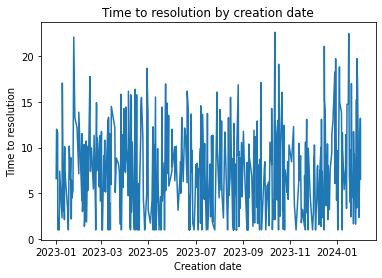

In [7]:
# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

sns.lineplot(x=df["opened_at"], y=df["resolution_time"])
plt.xlabel("Creation date")
plt.ylabel("Time to resolution")
plt.title("Time to resolution by creation date")

#### Generate JSON Description for the Insight


In [8]:
{
"data_type":"diagnostic",
"insight": "The time to resolution of incidents is uniform over time",
"insight_value":{"trend": "uniform"},
"plot": {
    "plot_type": "line",
    "title": "Trend of Time to Resolution (TTR) Over Time",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was opened."
    },
    "y_axis": {
        "name": "Average TTR (Days)",
        "description": "This represents the average time to resolution (in days) of incidents opened on a particular date."
    },
    "description": "The line plot displays the trend of time to resolution (TTR) over time. Each point on the line represents the average TTR for incidents opened on a particular date. The line is generally stable and unform with average ttr of 10 days."
},
"question": "What is the trend of time to resolution (ttr) over time?",
"actionable_insight": "The increasing trend in TTR suggests that it is not taking any longer to resolve incidents over time or there is no anomaly over time."
}

{'data_type': 'diagnostic',
 'insight': 'The time to resolution of incidents is uniform over time',
 'insight_value': {'trend': 'uniform'},
 'plot': {'plot_type': 'line',
  'title': 'Trend of Time to Resolution (TTR) Over Time',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was opened.'},
  'y_axis': {'name': 'Average TTR (Days)',
   'description': 'This represents the average time to resolution (in days) of incidents opened on a particular date.'},
  'description': 'The line plot displays the trend of time to resolution (TTR) over time. Each point on the line represents the average TTR for incidents opened on a particular date. The line is generally stable and unform with average ttr of 10 days.'},
 'question': 'What is the trend of time to resolution (ttr) over time?',
 'actionable_insight': 'The increasing trend in TTR suggests that it is not taking any longer to resolve incidents over time or there is no anomaly over time.'}

### **Question 4:** Is the increase in volume of incidents is uniform across all categories of incidents or is it more pronounced in a specific category?

#### Plot trend in volume of incident tickets per week by category

This cell creates a line plot to visualize the trend in the volume of incident tickets opened each week, categorized by incident type. The plot facilitates a detailed examination of how incident volumes are distributed across different categories over time and whether any specific category is experiencing more pronounced changes.

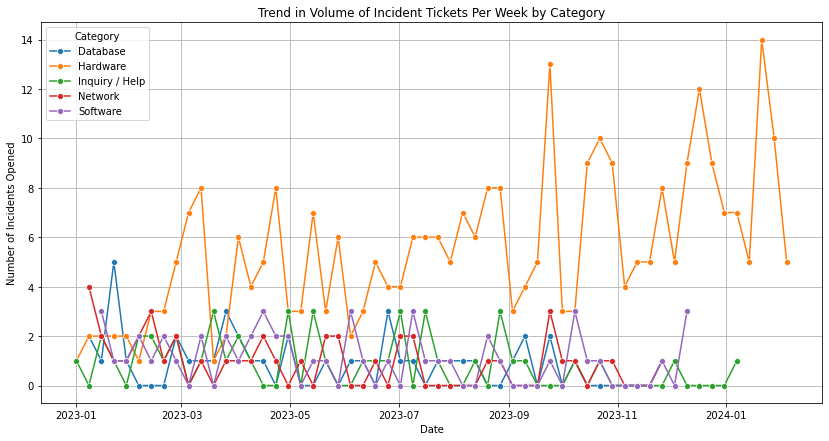

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has columns 'opened_at' and 'category'

# Convert 'opened_at' to datetime if it's not already
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Extract date from 'opened_at'
df['date'] = df['opened_at'].dt.date

# Group by category and date, then count the number of incidents
category_daily = df.groupby(['category', 'date']).size().reset_index(name='counts')

# Convert 'date' back to datetime for resampling
category_daily['date'] = pd.to_datetime(category_daily['date'])

# Prepare an empty DataFrame to hold resampled data
category_weekly = pd.DataFrame()

# Loop through each category to resample separately
for category in category_daily['category'].unique():
    temp_df = category_daily[category_daily['category'] == category]
    resampled_df = temp_df.set_index('date').resample('W').sum().reset_index()
    resampled_df['category'] = category  # add category column back after resampling
    category_weekly = pd.concat([category_weekly, resampled_df], ignore_index=True)

# Plot the trend for each category
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='counts', hue='category', data=category_weekly, marker='o')
plt.title("Trend in Volume of Incident Tickets Per Week by Category")
plt.xlabel("Date")
plt.ylabel("Number of Incidents Opened")
plt.legend(title='Category')
plt.grid(True)
plt.show()

#### Generate JSON Description for the Insight


In [10]:
{
"data_type":"time_series",
"insight": "The increase in volume of incidents is seen only for one particular categpry i.e. Hardware",
"plot": {
    "plot_type": "multiple_line",
    "title": "Trend of number of incidents opened Across Categories Over Time",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was opened."
    },
    "y_axis": {
        "name": "Average Volume (incident count)",
        "description": "This represents the average number of incidents opened on a particular date."
    },
    "description": "The multiple line plot displays the trend of volume of incidents across different categories over time. Each line represents a category and the points on the line represent the average volume of incidents of that category opened on a particular date. The trend is seen for hardware category, indicating that the increase in trend is specific to one particular category."
},
"question": "Is the increase in incidents uniform across all categories of incidents or is it more pronounced in a specific category?",
"actionable_insight": "The uniform increase in volume across Hardware categories suggests that the issue  specific to one particular category. This could indicate a systemic issue in the Hardware incident management process. It would be beneficial to investigate any system outage or device issues across the company"
}

{'data_type': 'time_series',
 'insight': 'The increase in volume of incidents is seen only for one particular categpry i.e. Hardware',
 'plot': {'plot_type': 'multiple_line',
  'title': 'Trend of number of incidents opened Across Categories Over Time',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was opened.'},
  'y_axis': {'name': 'Average Volume (incident count)',
   'description': 'This represents the average number of incidents opened on a particular date.'},
  'description': 'The multiple line plot displays the trend of volume of incidents across different categories over time. Each line represents a category and the points on the line represent the average volume of incidents of that category opened on a particular date. The trend is seen for hardware category, indicating that the increase in trend is specific to one particular category.'},
 'question': 'Is the increase in incidents uniform across all categories of incidents or i

### **Question 5**: Are there any trends in the productivity of the human agents over time?

#### Plot number of incidents resolved per agent

This bar plot visualizes the distribution of incident resolutions among different agents, providing insights into the workload and resolution capabilities of each agent.

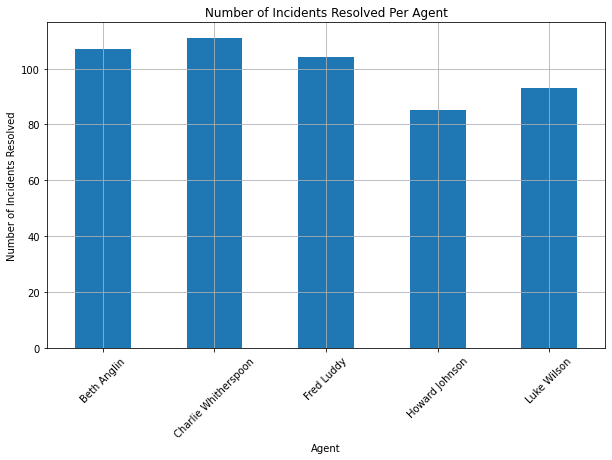

In [11]:
agent_incident_count = df.groupby('assigned_to')['number'].count()

# Plot the histogram
agent_incident_count.plot(kind='bar', figsize=(10,6))

plt.title('Number of Incidents Resolved Per Agent')
plt.xlabel('Agent')
plt.ylabel('Number of Incidents Resolved')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight


In [12]:
{
"data_type":"descriptive",
"insight": "The productivity is uniform across all agents, and all of them manage to resolve incidents even though the volume increases over time",
"plot": {
    "plot_type": "bar",
    "title": "Number of Incidents Resolved Per Agent",
    "x_axis": {
        "name": "Agent",
        "description": "This represents each agent assigned to resolve incidents."
    },
    "y_axis": {
        "name": "Number of Incidents Resolved",
        "description": "This represents the number of incidents resolved by an agent."
    },
    "description": "The bar chart displays the number of incidents resolved per agent. Each bar represents an agent and the height of the bar represents the number of incidents resolved by that agent. The number of incidents resolved is more or less uniform across all agents, indicating that productivity is fairly balanced."
},
"question": "Are there any trends in the productivity of the human agents over time? For instance, is there a decrease in the number of incidents resolved per agent over time?",
"actionable_insight": "The uniform productivity across all agents suggests that the workload is evenly distributed and all agents are equally productive. This is a positive indicator of good workload management. However, it would still be beneficial to continually monitor agent productivity and workload to ensure this balance is maintained."
}

{'data_type': 'descriptive',
 'insight': 'The productivity is uniform across all agents, and all of them manage to resolve incidents even though the volume increases over time',
 'plot': {'plot_type': 'bar',
  'title': 'Number of Incidents Resolved Per Agent',
  'x_axis': {'name': 'Agent',
   'description': 'This represents each agent assigned to resolve incidents.'},
  'y_axis': {'name': 'Number of Incidents Resolved',
   'description': 'This represents the number of incidents resolved by an agent.'},
  'description': 'The bar chart displays the number of incidents resolved per agent. Each bar represents an agent and the height of the bar represents the number of incidents resolved by that agent. The number of incidents resolved is more or less uniform across all agents, indicating that productivity is fairly balanced.'},
 'question': 'Are there any trends in the productivity of the human agents over time? For instance, is there a decrease in the number of incidents resolved per agent

### **Question 6**: What can be done to avoid such increase in incidents in the future?

### Strategies to Avoid  Increase in Hardware Incidents:



1. **Regular Updates and Maintenance**: Establish a routine for regular updates and maintenance of all systems and hardware. This can help prevent the uniform aging and degradation of infrastructure.

2. **Proactive Monitoring and Predictive Maintenance**: Utilize tools for proactive monitoring and predictive maintenance to identify and address potential issues before they result in incidents. Machine learning models can predict failure points based on historical data.

3. **Effective diagnosis**: Identify the location and reason for Hardware failure. 

By addressing these areas, you can help prevent a increase in incidents across Hardware categories, ensuring more stable and reliable operations.

#### Generate JSON Description for the Insight


In [13]:
{
"data_type":"prescriptive",
"insight": "1. **Regular Updates and Maintenance**: Establish a routine for regular updates and maintenance of all systems and hardware. This can help prevent the uniform aging and degradation of infrastructure.\
2. **Proactive Monitoring and Predictive Maintenance**: Utilize tools for proactive monitoring and predictive maintenance to identify and address potential issues before they result in incidents. Machine learning models can predict failure points based on historical data. \
3. **Effective diagnosis**: Identify the location and reason for Hardware failure. "
}

{'data_type': 'prescriptive',
 'insight': '1. **Regular Updates and Maintenance**: Establish a routine for regular updates and maintenance of all systems and hardware. This can help prevent the uniform aging and degradation of infrastructure.2. **Proactive Monitoring and Predictive Maintenance**: Utilize tools for proactive monitoring and predictive maintenance to identify and address potential issues before they result in incidents. Machine learning models can predict failure points based on historical data. 3. **Effective diagnosis**: Identify the location and reason for Hardware failure. '}

### **Question 7**: What can be reason for such increase in incidents over time?

In [14]:
{
"data_type":"predictive",
"insight": "If the number of Hardware incidents over time is linearly increasing, it suggests a specific device issue or trend affecting the entire location or infrastructure. Here are some potential reasons why this might be happening and strategies to avoid or mitigate such trends: \
    1. **Aging Infrastructure**: Over time, systems and hardware can age and become more prone to failures, leading to a steady increase in incidents across all categories if regular updates and maintenance are not performed \
    2. **Lack of Proactive Maintenance**: Without proactive maintenance and updates, systems may deteriorate uniformly, leading to increased incidents."
}


{'data_type': 'predictive',
 'insight': 'If the number of Hardware incidents over time is linearly increasing, it suggests a specific device issue or trend affecting the entire location or infrastructure. Here are some potential reasons why this might be happening and strategies to avoid or mitigate such trends:     1. **Aging Infrastructure**: Over time, systems and hardware can age and become more prone to failures, leading to a steady increase in incidents across all categories if regular updates and maintenance are not performed     2. **Lack of Proactive Maintenance**: Without proactive maintenance and updates, systems may deteriorate uniformly, leading to increased incidents.'}

### **Question 7**: Can we identify specific sub-categories or types of hardware that are most problematic during these anomaly periods?

#### Plot Word Clouds for Problematic Sub-Categories or Types within Each Category
This cell creates a series of word clouds to visualize the most frequent terms within the 'short_description' of incidents for each category, specifically focusing on identifying problematic sub-categories or types during anomaly periods.

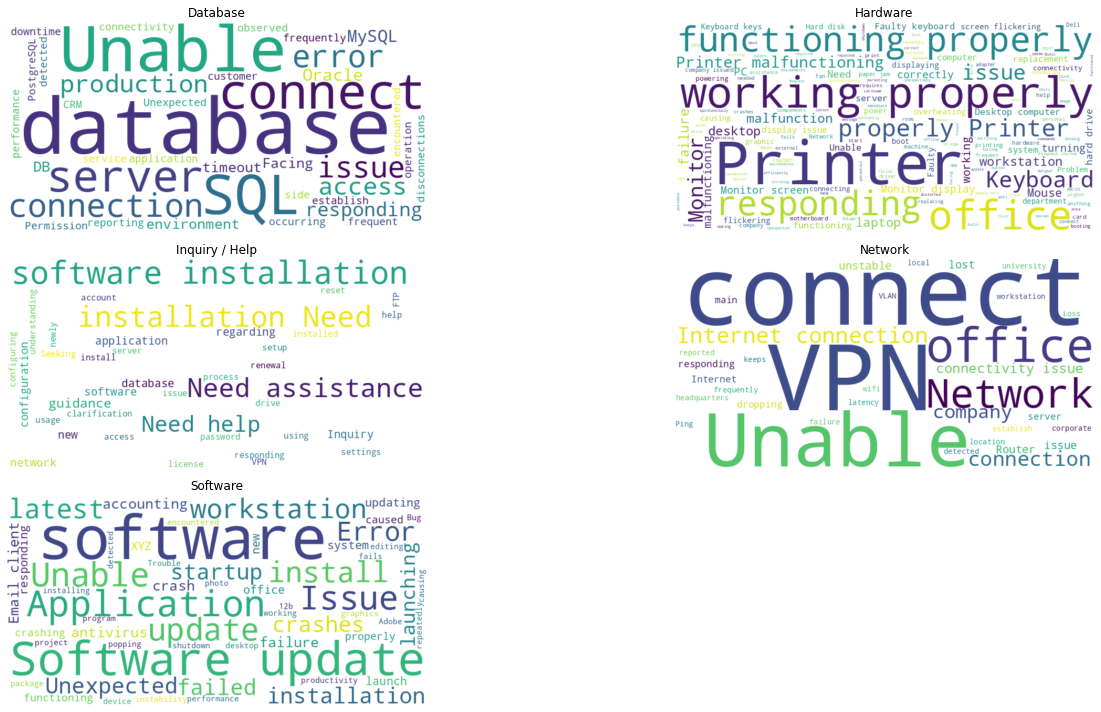

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Grouping the data by 'category' and concatenating 'short_description'
grouped_descriptions = df.groupby('category')['short_description'].apply(lambda x: ' '.join(x)).reset_index()

# Setting up the plot with appropriate size
plt.figure(figsize=(20, 10))

# Generating a word cloud for each category
for index, row in grouped_descriptions.iterrows():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(row['short_description'])
    
    plt.subplot(3, 2, index+1)  # Adjust the grid size according to the number of categories
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(row['category'])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight


In [16]:
{
    "data_type": "descriptive",
    "insight": "Specific hardware issues mention Printer issues predominantly in the incident descriptions",
    "insight_value": {
        "category": "Hardware",
        "common_words": ["printer", "working properly", "functioning properly"]
    },
    "plot": {
        "plot_type": "word_cloud",
        "title": "Word Clouds for Problematic Sub-Categories within Each Category",
        "x_axis": {
            "name": "Category",
            "description": "This represents each category for which the word cloud is generated."
        },
        "y_axis": {
            "name": "Frequency of Terms",
            "description": "This represents the frequency of terms within the incident descriptions, visualized through the size of words in the word cloud."
        },
        "description": "The word clouds display the most frequent terms in incident descriptions for each category, highlighting specific sub-categories or types that are problematic. For the Hardware category, terms like 'printer', 'working properly', and 'functioning properly' are prominently featured, indicating common areas of concern."
    },
    "question": "Can we identify specific sub-categories or types of hardware that are most problematic during these anomaly periods?",
    "actionable_insight": "The frequent mention of specific terms like 'printer' in the Hardware category suggests a recurring issue with this type of hardware. This insight could lead to targeted checks and maintenance efforts on printers to prevent frequent incidents, thereby improving overall operational efficiency."
}


{'data_type': 'descriptive',
 'insight': 'Specific hardware issues mention Printer issues predominantly in the incident descriptions',
 'insight_value': {'category': 'Hardware',
  'common_words': ['printer', 'working properly', 'functioning properly']},
 'plot': {'plot_type': 'word_cloud',
  'title': 'Word Clouds for Problematic Sub-Categories within Each Category',
  'x_axis': {'name': 'Category',
   'description': 'This represents each category for which the word cloud is generated.'},
  'y_axis': {'name': 'Frequency of Terms',
   'description': 'This represents the frequency of terms within the incident descriptions, visualized through the size of words in the word cloud.'},
  'description': "The word clouds display the most frequent terms in incident descriptions for each category, highlighting specific sub-categories or types that are problematic. For the Hardware category, terms like 'printer', 'working properly', and 'functioning properly' are prominently featured, indicating co

### Summary of Findings (Flag 4)
 There is a linear trend in the distribution of incidents across categories over time, indicating that the number of incidents is growing day by day.

1. **Specific Category Growth**: Analysis reveals that the overall increase in the volume of incidents is not uniform across all categories. Incidents within the hardware category, for example, are showing a consistent linear increase over time, suggesting a growing issue or expanding needs in this area.
2. **Impact on Human Agents**: The growing number of incidents has led to human agents working overtime recently, indicating an increased workload that might be impacting their efficiency and well-being.

These findings indicate a need to concentrate resources and troubleshooting efforts on the Hardware category to address and mitigate the rising trend of incidents.